<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/zad_klasteryzacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

try:
    df = pd.read_csv('PersonalData.csv', index_col=0)
except FileNotFoundError:
    data = {
        'imie': ['Anna', 'Bob'],
        'wiek': [25, 35],
        'zarobki': [5, 10]
    }
    df = pd.DataFrame(data)

# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

zarobki_col = next((col for col in numeric_df.columns if 'zarobk' in col.lower()), None)

print(f"Columns found: {numeric_df.columns.tolist()}")
print(f"Earnings column identified as: {zarobki_col}")

if zarobki_col is None:
    print("Warning: 'Zarobki' column not found. Using all numeric columns.")
    zarobki_col = numeric_df.columns[0]

# Select records A and B
if 'A' in numeric_df.index and 'B' in numeric_df.index:
    rec_a = numeric_df.loc['A']
    rec_b = numeric_df.loc['B']
else:
    rec_a = numeric_df.iloc[0]
    rec_b = numeric_df.iloc[1]

print(f"Record A ({rec_a.name}):\n{rec_a.values}")
print(f"Record B ({rec_b.name}):\n{rec_b.values}")

# 1. Euclidean Distance (Raw)
dist_raw = distance.euclidean(rec_a, rec_b)

# 2. Scaled Zarobki (x1000)
df_scaled = numeric_df.copy()
if zarobki_col:
    df_scaled[zarobki_col] = df_scaled[zarobki_col] * 1000

rec_a_scaled = df_scaled.loc[rec_a.name]
rec_b_scaled = df_scaled.loc[rec_b.name]
dist_scaled = distance.euclidean(rec_a_scaled, rec_b_scaled)

stds = numeric_df.std(ddof=1)
stds = stds.replace(0, 1)
df_norm = numeric_df / stds
rec_a_norm = df_norm.loc[rec_a.name]
rec_b_norm = df_norm.loc[rec_b.name]
dist_norm = distance.euclidean(rec_a_norm, rec_b_norm)

# 4. Minkowski & Manhattan
dist_minkowski = distance.minkowski(rec_a, rec_b, p=3)
dist_manhattan = distance.cityblock(rec_a, rec_b)

print("\nRESULTS:")
print(f"1. Euclidean (Raw): {dist_raw:.4f}")
print(f"2. Euclidean (Scaled {zarobki_col}): {dist_scaled:.4f}")
print(f"3. Euclidean (Normalized): {dist_norm:.4f}")
print(f"4. Minkowski (p=3): {dist_minkowski:.4f}")
print(f"5. Manhattan: {dist_manhattan:.4f}")

Columns found: ['Wzrost (cm)', 'Waga (kg)', 'Staz (lata)', 'Zarobki (tys.)', 'Ocena (pkt.)', 'Piętro', 'Dzieci', 'Odleglosc (km)']
Earnings column identified as: Zarobki (tys.)
Record A (A):
[190.   88.    3.    3.5   7.    6.    1.   25. ]
Record B (B):
[172.   70.   12.    4.3   5.    1.    4.   12. ]

RESULTS:
1. Euclidean (Raw): 30.6046
2. Euclidean (Scaled Zarobki (tys.)): 800.5848
3. Euclidean (Normalized): 4.0000
4. Minkowski (p=3): 24.5246
5. Manhattan: 68.8000


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [ ]:
def lcs_length(x: str, y: str) -> int:
    n = len(x)
    m = len(y)

    # Tablica dynamiczna
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[n][m]


def dna_distance(x: str, y: str) -> int:
    lcs_len = lcs_length(x, y)
    return len(x) + len(y) - 2 * lcs_len


# Przykład użycia
x = "abcde"
y = "bcdeh"

print("Sekwencja x:", x)
print("Sekwencja y:", y)
print("D(x, y) =", dna_distance(x, y))


Sekwencja x: abcde
Sekwencja y: bcdeh
D(x, y) = 2


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Dane wejściowe
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"
film4 = "rakieta mars astronauta czerwona planeta"

filmy = [film1, film2, film3]

# a. CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filmy)

print("=== SŁOWNIK ===")
print(vectorizer.get_feature_names_out())

print("\n=== MACIERZ WEKTORÓW (CountVectorizer) ===")
print(X.toarray())

# b. Podobieństwo cosinusowe
cos_sim = cosine_similarity(X)

print("\n=== MACIERZ PODOBIEŃSTWA COSINUSOWEGO ===")
print(np.round(cos_sim, 3))

# c. Najbardziej i najmniej podobne filmy
film_names = ["film1", "film2", "film3"]

max_sim = -1
min_sim = 1
most_similar = None
least_similar = None

for i in range(len(filmy)):
    for j in range(i + 1, len(filmy)):
        sim = cos_sim[i][j]
        if sim > max_sim:
            max_sim = sim
            most_similar = (film_names[i], film_names[j])
        if sim < min_sim:
            min_sim = sim
            least_similar = (film_names[i], film_names[j])

print("\n=== WYNIKI ===")
print(f"Najbardziej podobne filmy: {most_similar} (cosine = {max_sim:.3f})")
print(f"Najmniej podobne filmy: {least_similar} (cosine = {min_sim:.3f})")

# d. Dodanie czwartego filmu
filmy2 = [film1, film2, film3, film4]
film_names2 = ["film1", "film2", "film3", "film4"]

X2 = vectorizer.fit_transform(filmy2)
cos_sim2 = cosine_similarity(X2)

print("\n=== MACIERZ PODOBIEŃSTWA Z FILM4 ===")
print(np.round(cos_sim2, 3))

film4_index = 3
best_match_index = np.argmax(cos_sim2[film4_index, :film4_index])

print(
    f"\nFilm4 jest najbardziej podobny do: "
    f"{film_names2[best_match_index]} "
    f"(cosine = {cos_sim2[film4_index][best_match_index]:.3f})"
)


=== SŁOWNIK ===
['astronauta' 'kosmiczna' 'krew' 'księżyc' 'misja' 'mroczny' 'noc' 'obca'
 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']

=== MACIERZ WEKTORÓW (CountVectorizer) ===
[[1 1 0 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1]]

=== MACIERZ PODOBIEŃSTWA COSINUSOWEGO ===
[[1.  0.4 0. ]
 [0.4 1.  0. ]
 [0.  0.  1. ]]

=== WYNIKI ===
Najbardziej podobne filmy: ('film1', 'film2') (cosine = 0.400)
Najmniej podobne filmy: ('film1', 'film3') (cosine = 0.000)

=== MACIERZ PODOBIEŃSTWA Z FILM4 ===
[[1.  0.4 0.  0.4]
 [0.4 1.  0.  0.4]
 [0.  0.  1.  0. ]
 [0.4 0.4 0.  1. ]]

Film4 jest najbardziej podobny do: film1 (cosine = 0.400)


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

Optimal number of clusters found: 3


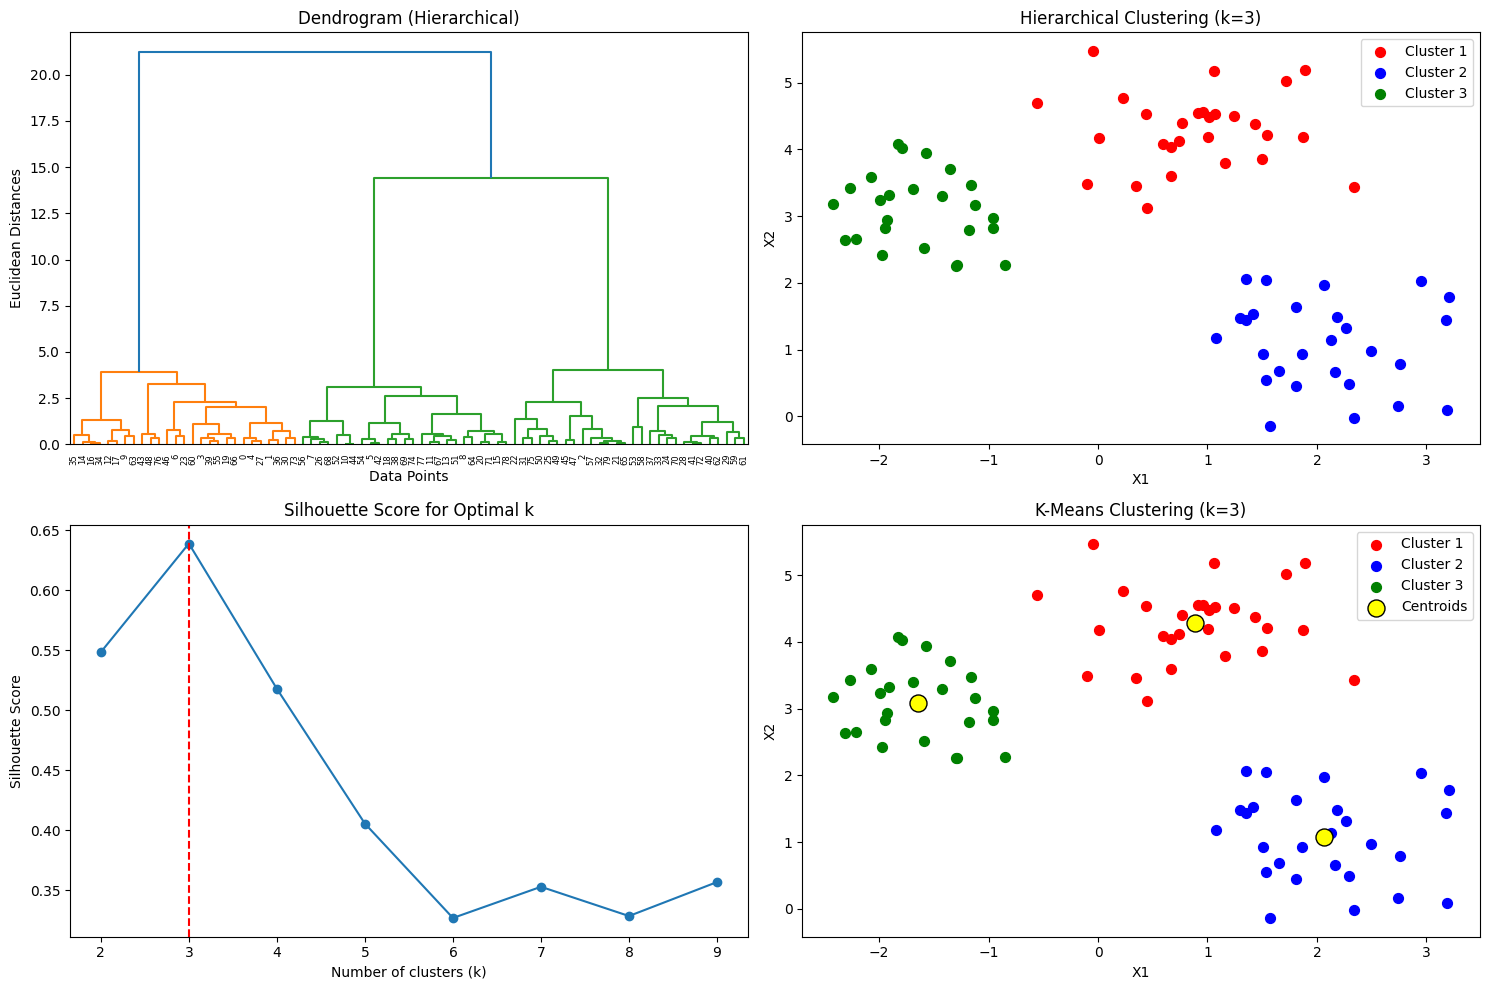

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import numpy as np

# Load the data
file_path = 'k_means_data.csv'
df = pd.read_csv(file_path)

# Perform a quick check and reload if necessary
if df.shape[1] == 1: # Maybe comma separated but parsed wrong due to header
    df = pd.read_csv(file_path, header=0, names=['X1', 'X2'])
else:
    # Clean column names if they have '#'
    df.columns = [c.replace('#', '').strip() for c in df.columns]

X = df.values

# Determine optimal k using Silhouette Score
silhouette_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

best_k = K_range[np.argmax(silhouette_scores)]

# --- Hierarchical Clustering ---
# Dendrogram
plt.figure(figsize=(15, 10))

# Plot 1: Dendrogram
plt.subplot(2, 2, 1)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram (Hierarchical)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')

# Run Agglomerative Clustering with best_k
hc = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Plot 2: Agglomerative Clustering Results
plt.subplot(2, 2, 2)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
if best_k > 2:
    plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
if best_k > 3:
    plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
if best_k > 4:
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.title(f'Hierarchical Clustering (k={best_k})')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# --- K-Means Clustering ---
# Run K-Means with best_k
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot 3: Elbow/Silhouette (to show why k was chosen)
plt.subplot(2, 2, 3)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.axvline(x=best_k, color='r', linestyle='--')

# Plot 4: K-Means Clustering Results
plt.subplot(2, 2, 4)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
if best_k > 2:
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
if best_k > 3:
    plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
if best_k > 4:
    plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')

# Plot Centroids for K-Means
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label='Centroids', edgecolors='black')
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.savefig('clustering_results.png')

print(f"Optimal number of clusters found: {best_k}")

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

Zbieżność osiągnięta w iteracji 5


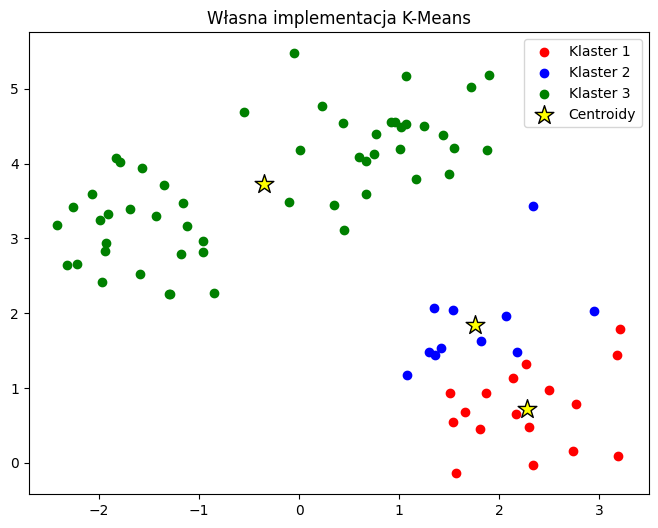

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('k_means_data.csv')
df.columns = [c.replace('#', '').strip() for c in df.columns]
X = df.values

# 2. Samodzielna funkcja K-Means
def custom_kmeans(X, k, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape

    # KROK 1: Inicjalizacja - losowy wybór k punktów jako startowe centroidy
    rng = np.random.RandomState(42)
    random_indices = rng.permutation(n_samples)[:k]
    centroids = X[random_indices]

    for i in range(max_iters):
        # KROK 2: Przypisanie punktów do najbliższego centroidu
        # Obliczamy odległość euklidesową każdego punktu do każdego centroidu
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # KROK 3: Aktualizacja centroidów (średnia punktów w klastrze)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Sprawdzenie warunku stopu (czy centroidy się przesunęły?)
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            print(f"Zbieżność osiągnięta w iteracji {i}")
            break

        centroids = new_centroids

    return centroids, labels

# 3. Uruchomienie algorytmu dla k=3
k = 3
centroids, labels = custom_kmeans(X, k)

# 4. Wizualizacja
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Klaster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='*', edgecolors='black', label='Centroidy')
plt.title('Własna implementacja K-Means')
plt.legend()
plt.show()

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [ ]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

=== PIERWSZE WIERSZE ZBIORU ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


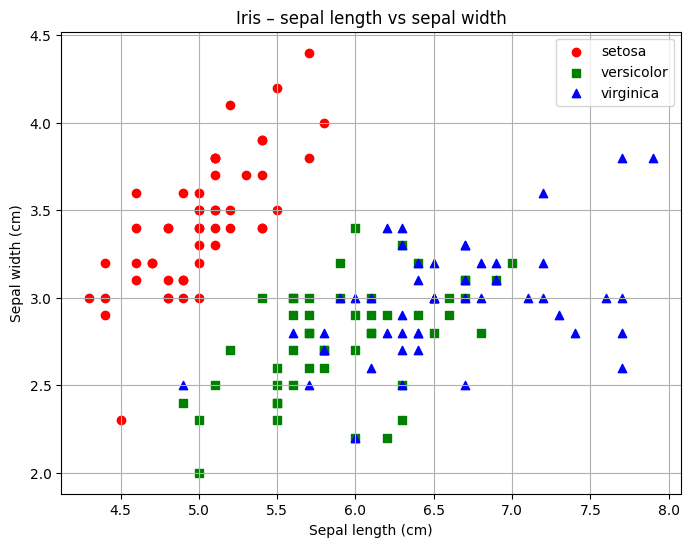


=== STATYSTYKI OPISOWE ===
                   min  max       std
sepal length (cm)  4.3  7.9  0.828066
sepal width (cm)   2.0  4.4  0.435866
petal length (cm)  1.0  6.9  1.765298
petal width (cm)   0.1  2.5  0.762238

=== MACIERZ KORELACJI ===
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


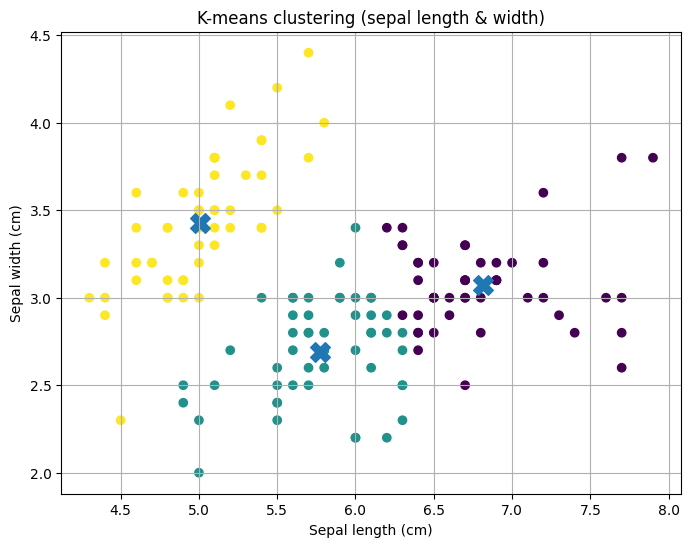

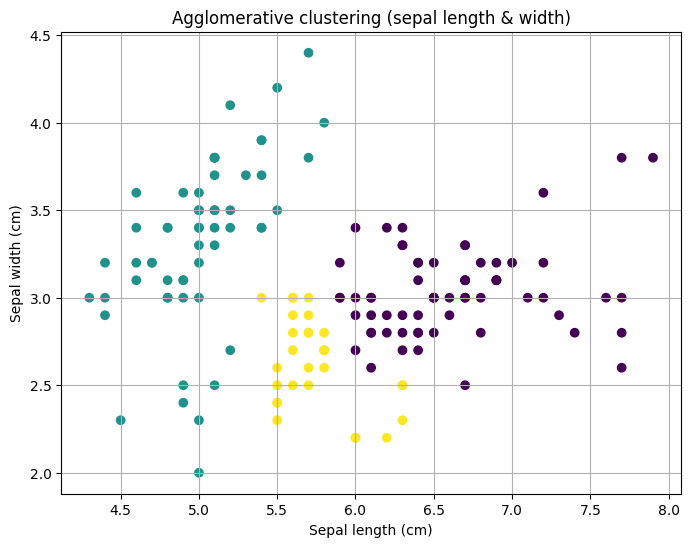

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering

# =========================
# 1. Załaduj zbiór iris
# =========================
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Konwersja do DataFrame (wygodniejsze obliczenia)
df = pd.DataFrame(X, columns=feature_names)
df["class"] = y

print("=== PIERWSZE WIERSZE ZBIORU ===")
print(df.head())

# =========================
# 2. Wykres rozrzutu
# sepal_length vs sepal_width
# =========================
plt.figure(figsize=(8, 6))

markers = ["o", "s", "^"]
colors = ["red", "green", "blue"]

for i, class_name in enumerate(target_names):
    plt.scatter(
        df[df["class"] == i]["sepal length (cm)"],
        df[df["class"] == i]["sepal width (cm)"],
        marker=markers[i],
        color=colors[i],
        label=class_name
    )

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris – sepal length vs sepal width")
plt.legend()
plt.grid(True)
plt.show()

# =========================
# 3. Min, max, średnie odchylenie kwadratowe
# =========================
print("\n=== STATYSTYKI OPISOWE ===")

stats = pd.DataFrame({
    "min": df[feature_names].min(),
    "max": df[feature_names].max(),
    "std": df[feature_names].std()  # odchylenie standardowe
})

print(stats)

# =========================
# 4. Współczynniki korelacji
# =========================
print("\n=== MACIERZ KORELACJI ===")
correlation_matrix = df[feature_names].corr()
print(correlation_matrix)

# =========================
# 5. K-średnich (KMeans)
# tylko sepal_length i sepal_width
# =========================
X_sepal = df[["sepal length (cm)", "sepal width (cm)"]].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_sepal)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_sepal[:, 0],
    X_sepal[:, 1],
    c=kmeans_labels
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="X",
    s=200
)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("K-means clustering (sepal length & width)")
plt.grid(True)
plt.show()

# =========================
# 6. Klasteryzacja hierarchiczna (aglomeracyjna)
# =========================
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_sepal)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_sepal[:, 0],
    X_sepal[:, 1],
    c=agg_labels
)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Agglomerative clustering (sepal length & width)")
plt.grid(True)
plt.show()


## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [ ]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [ ]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [ ]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak


Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Missing values before drop:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Data Info after dropping NaNs:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype

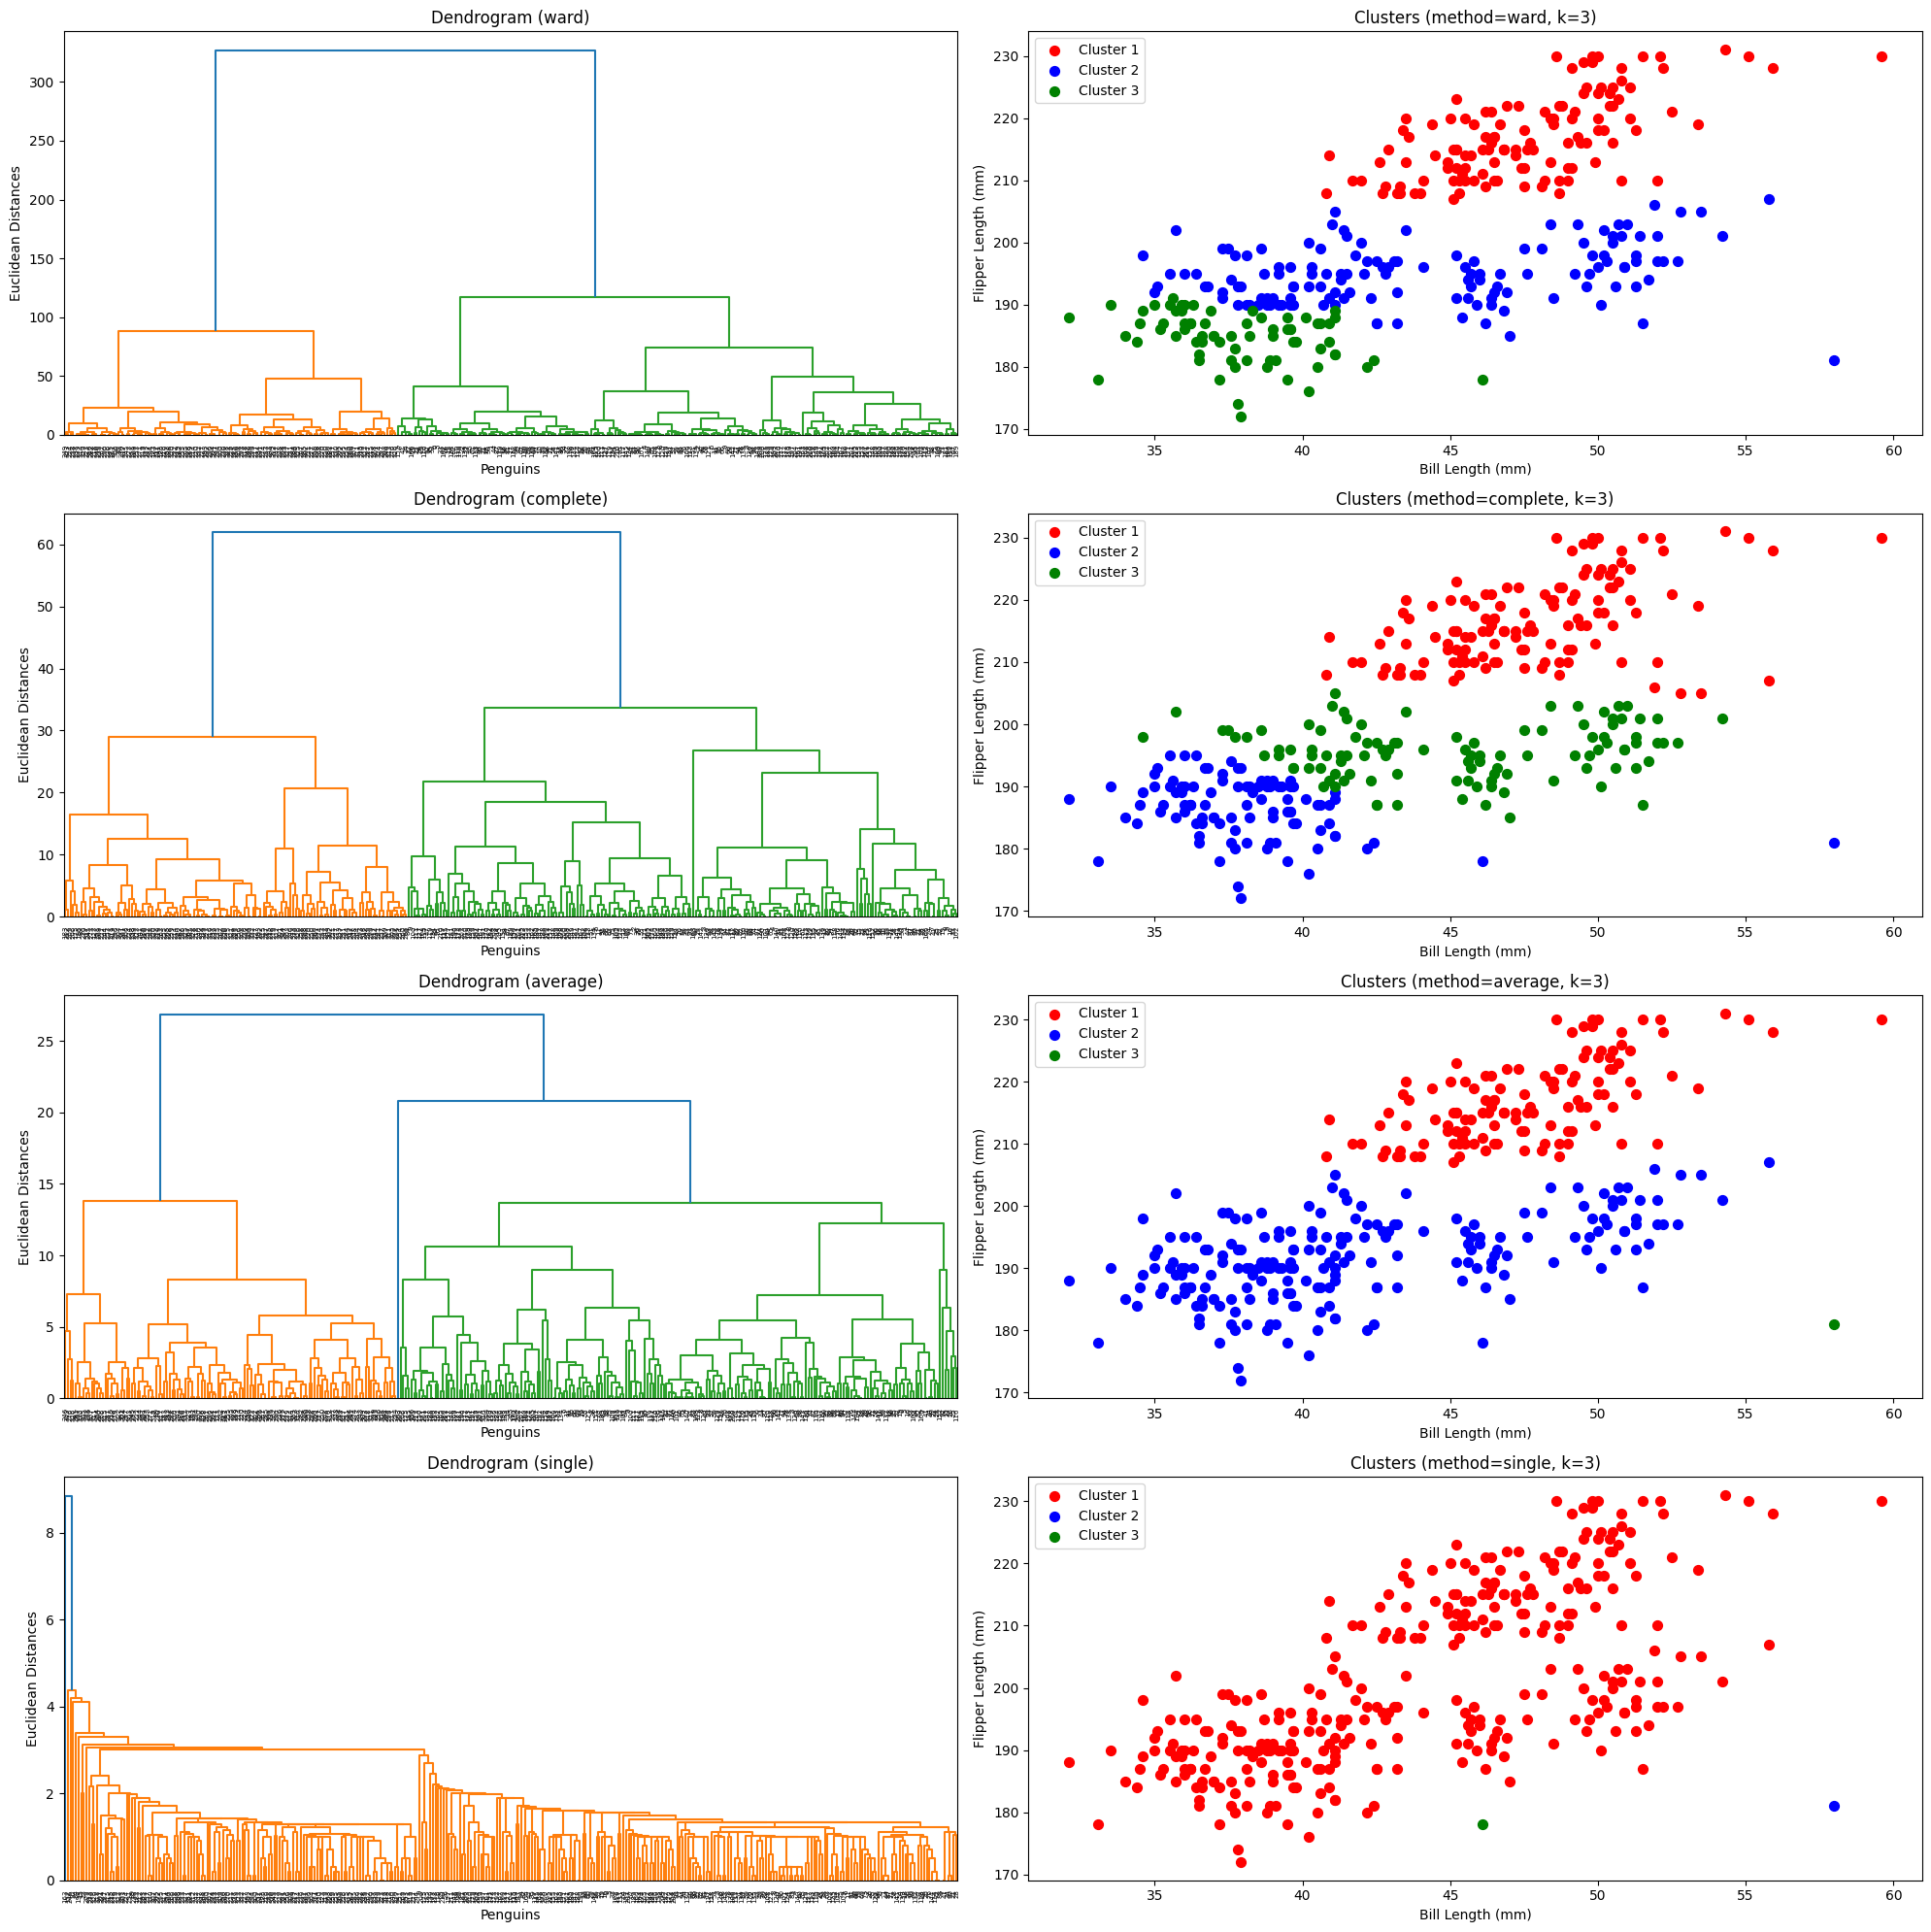

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np

df = pd.read_csv('penguins.csv')

# 2. Basic Info & 3. Missing Data
print("Original Data Info:")
print(df.info())
print("\nMissing values before drop:")
print(df.isnull().sum())

df_clean = df.dropna()
print("\nData Info after dropping NaNs:")
print(df_clean.info())

# 4. Feature Selection
X = df_clean[['bill_length_mm', 'flipper_length_mm']].values

# 5. Testing different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
n_clusters = 3  # Assuming 3 species of penguins, a reasonable starting point for k

plt.figure(figsize=(20, 20))

for i, method in enumerate(linkage_methods):
    # Position for Dendrogram
    plt.subplot(4, 2, 2*i + 1)

    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title(f'Dendrogram ({method})')
    plt.xlabel('Penguins')
    plt.ylabel('Euclidean Distances')

    # Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=method)
    y_hc = hc.fit_predict(X)

    # Position for Scatter Plot
    plt.subplot(4, 2, 2*i + 2)

    # Scatter Plot
    # We have 3 clusters, let's map colors
    colors = ['red', 'blue', 'green', 'cyan', 'magenta']
    for c in range(n_clusters):
        plt.scatter(X[y_hc == c, 0], X[y_hc == c, 1], s=50, c=colors[c], label=f'Cluster {c+1}')

    plt.title(f'Clusters (method={method}, k={n_clusters})')
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Flipper Length (mm)')
    plt.legend()

plt.tight_layout()
plt.savefig('penguins_clustering_comparison.png')

print(f"\nAnalysis complete. Used features: bill_length_mm, flipper_length_mm.")
print(f"Number of clusters used for grouping: {n_clusters}")